# Flo Graph

## 필요 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math
from numpy import nan

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

## 파일 불러오기

In [5]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [6]:
# flo 실시간 순위 파일 폴더로 이동
live_folder = '/crawled_data/live_flo/'
os.chdir(code_path + live_folder)

In [9]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_flo_20220405.xlsx
1 live_flo_20220406.xlsx
2 live_flo_20220407.xlsx
3 live_flo_20220412.xlsx
4 live_flo_20220413.xlsx
5 live_flo_20220414_110035.xlsx
6 live_flo_20220415_110026.xlsx
7 live_flo_20220418_110024.xlsx
8 live_flo_20220419_110028.xlsx
9 live_flo_20220420_110013.xlsx
10 live_flo_20220421_110051.xlsx
11 live_flo_20220422_110026.xlsx
12 live_flo_20220423_110023.xlsx
13 live_flo_20220425_110022.xlsx
14 live_flo_20220426_110029.xlsx
15 live_flo_20220427_110027.xlsx
16 live_flo_20220428_110009.xlsx
17 live_flo_20220429_110008.xlsx
18 live_flo_20220430_110005.xlsx
19 live_flo_20220501_110005.xlsx
20 live_flo_20220502_110110.xlsx
21 live_flo_20220502_154533.xlsx


## 수집한 파일 모두 합치기

In [10]:
start_date = '2022-04-18'
end_date = '2022-04-23'

In [11]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-05,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-05,2,TOMBOY,(여자)아이들,I NEVER DIE
2,2022-04-05,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
3,2022-04-05,4,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,2022-04-05,5,GANADARA (Feat. 아이유),박재범,GANADARA


In [12]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-18,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-18,2,LOVE DIVE,IVE (아이브),LOVE DIVE
2,2022-04-18,3,TOMBOY,(여자)아이들,I NEVER DIE
3,2022-04-18,4,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
4,2022-04-18,5,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)


In [13]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
595,2022-04-23,96,밝게 빛나는 별이 되어 비춰줄게,송이한,밝게 빛나는 별이 되어 비춰줄게
596,2022-04-23,97,내가 아니라도,주호,내가 아니라도
597,2022-04-23,98,Can't Control Myself,태연 (TAEYEON),Can't Control Myself
598,2022-04-23,99,마지막 너의 인사,헤이즈 (Heize),우리들의 블루스 OST Part 2
599,2022-04-23,100,My Universe,방탄소년단,My Universe


In [14]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      600 non-null    object
 1   순위      600 non-null    int64 
 2   곡       600 non-null    object
 3   가수      600 non-null    object
 4   앨범      600 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


### 수집한 곡의 유니크

In [15]:
len(sliced_df['곡'].unique())

110

In [16]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23


### 순위변동 열 추가한 df 생성

In [29]:
song_df_list = []
for one in sliced_df['곡'].unique():
    one_df = sliced_df[sliced_df['곡'] == one].reset_index(drop=True)
    one_df['순위변동'] = -( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    song_df_list.append(merged_df)

### 노래 개수

In [30]:
len(song_df_list)

110

## 그래프 테스트

### 노래 선택

In [31]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      6 non-null      object
 1   순위      6 non-null      int64 
 2   곡       6 non-null      object
 3   가수      6 non-null      object
 4   앨범      6 non-null      object
 5   순위변동    6 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 336.0+ bytes


In [32]:
tmp = song_df_list[25]
tmp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,26,Real Love,오마이걸 (OH MY GIRL),Real Love,0
1,2022-04-19,23,Real Love,오마이걸 (OH MY GIRL),Real Love,3
2,2022-04-20,21,Real Love,오마이걸 (OH MY GIRL),Real Love,2
3,2022-04-21,23,Real Love,오마이걸 (OH MY GIRL),Real Love,-2
4,2022-04-22,26,Real Love,오마이걸 (OH MY GIRL),Real Love,-3
5,2022-04-23,35,Real Love,오마이걸 (OH MY GIRL),Real Love,-9


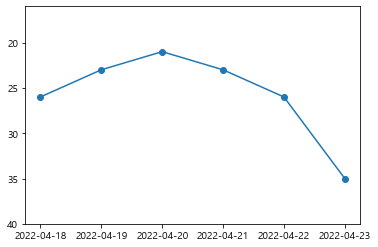

In [33]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist
min_limit = min(tmp['순위'].values)
max_limit = max(tmp['순위'].values)
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.ylim(max_limit + 5, min_limit - 5);

In [34]:
song_df_list[70]['순위'].values

array([71, 70, 67, 68, 71, 65], dtype=int64)

In [35]:
min(song_df_list[70]['순위'].values)

65

In [36]:
type(min(song_df_list[70]['순위'].values))

numpy.int64

In [37]:
max(song_df_list[70]['순위'].values)

71

In [38]:
temp_df = song_df_list[70:91]

### 그래프

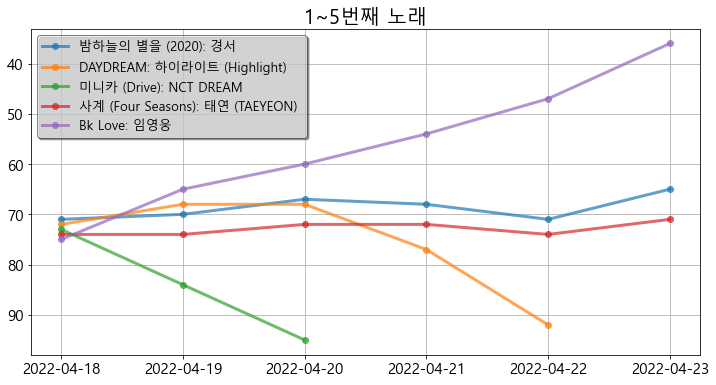

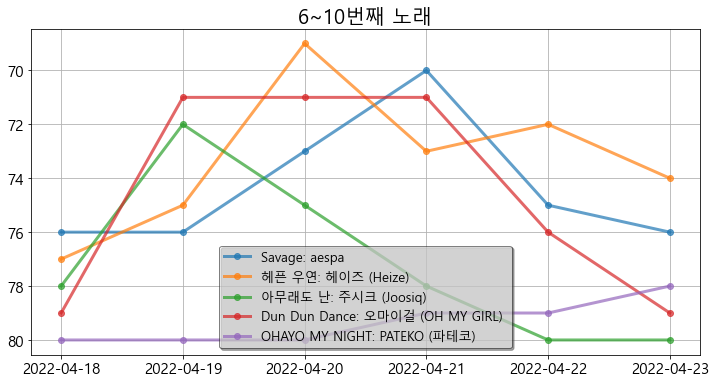

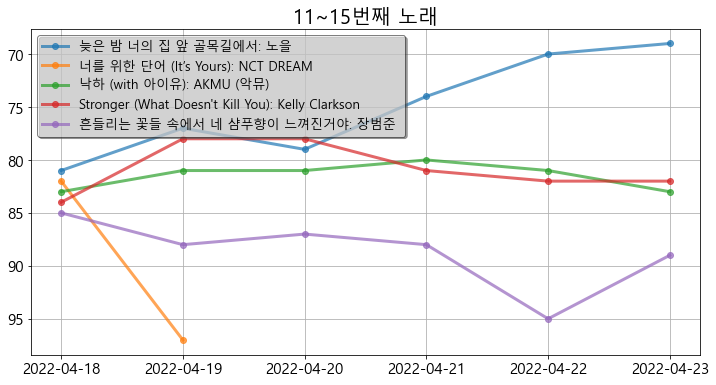

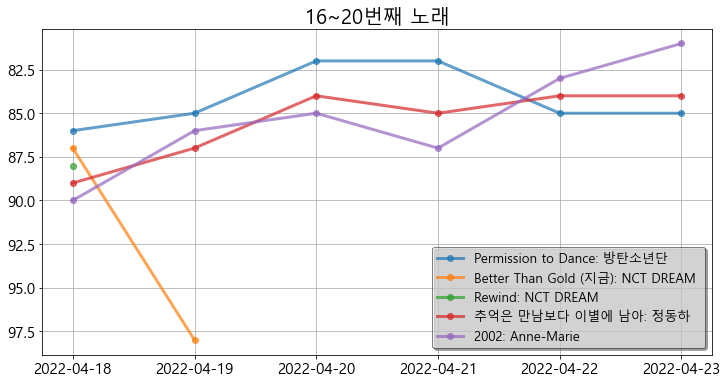

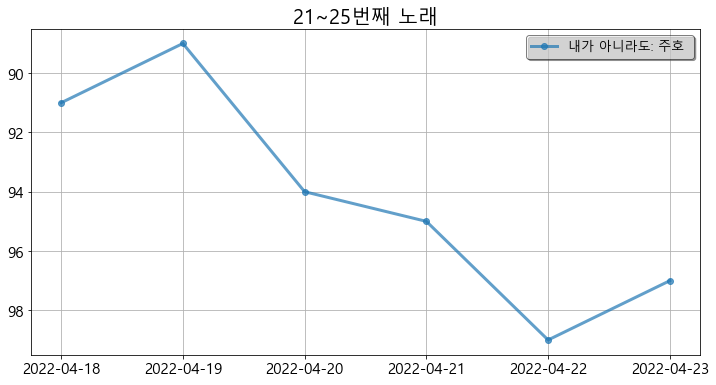

In [71]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(12, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [68]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

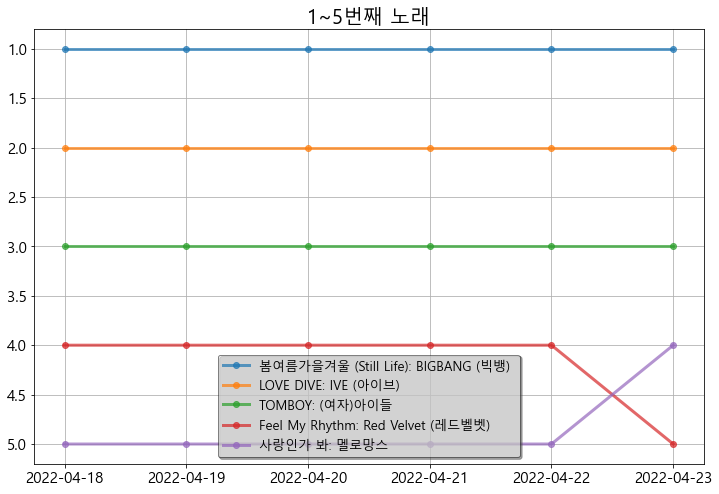

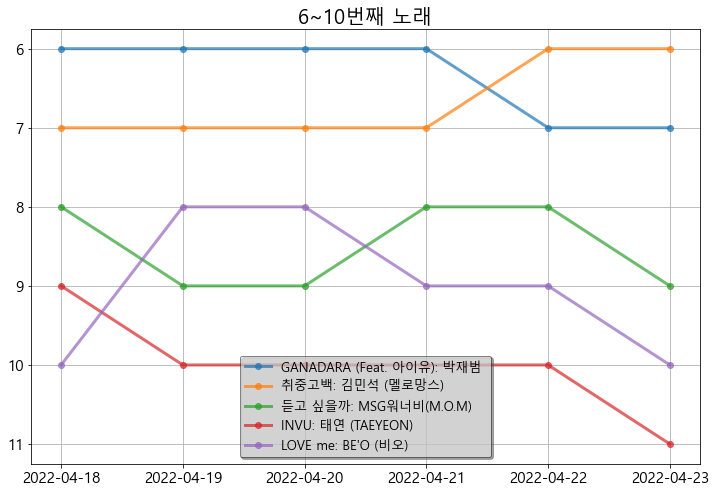

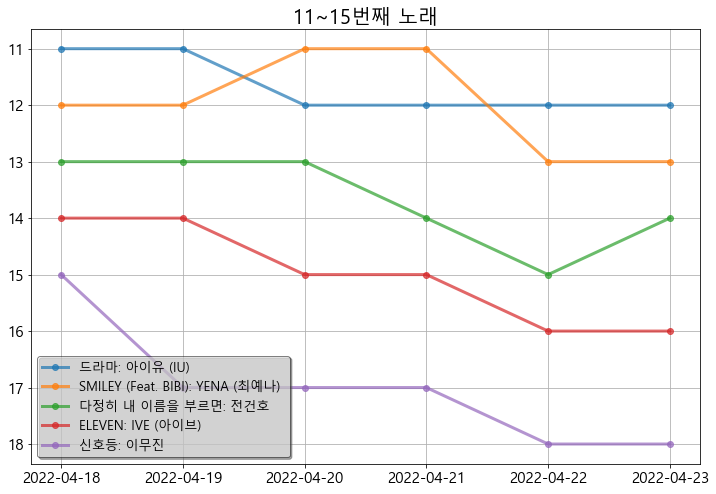

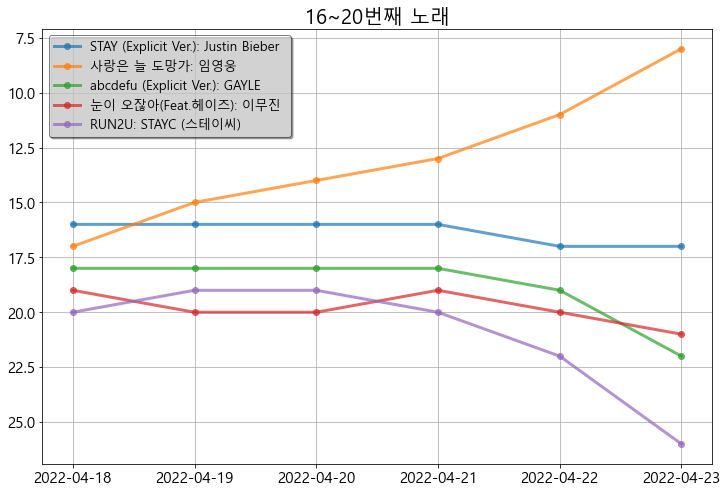

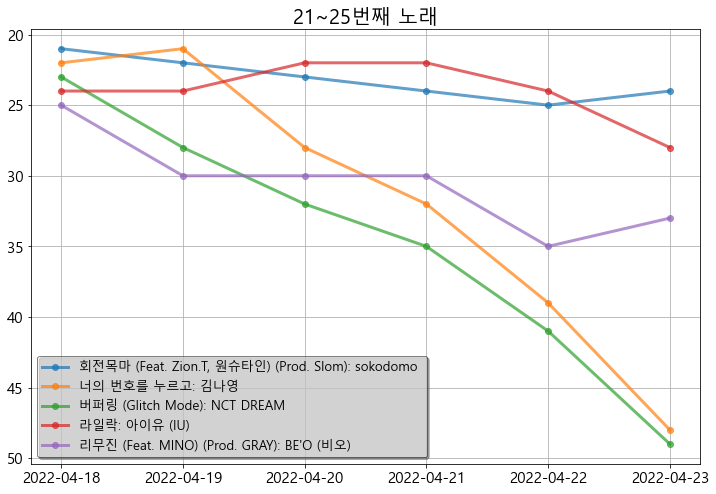

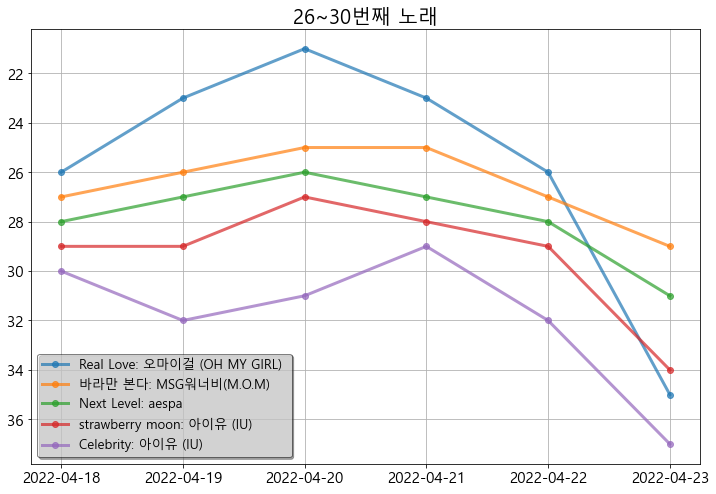

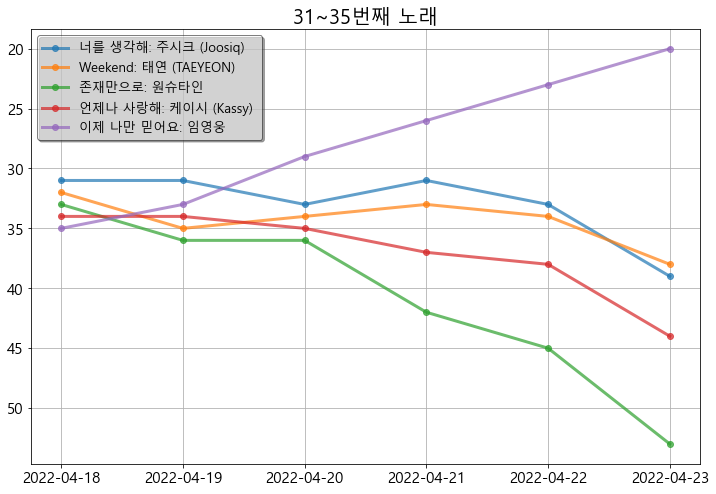

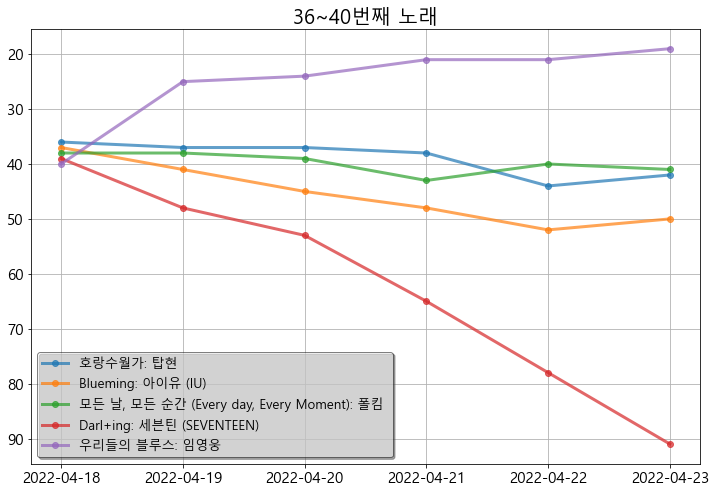

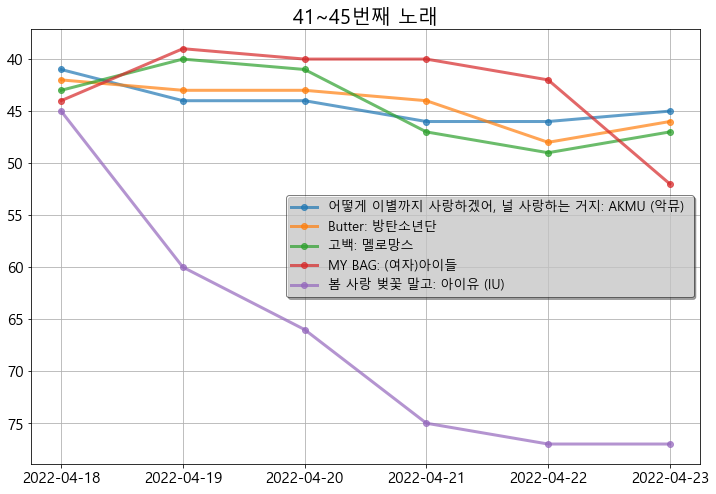

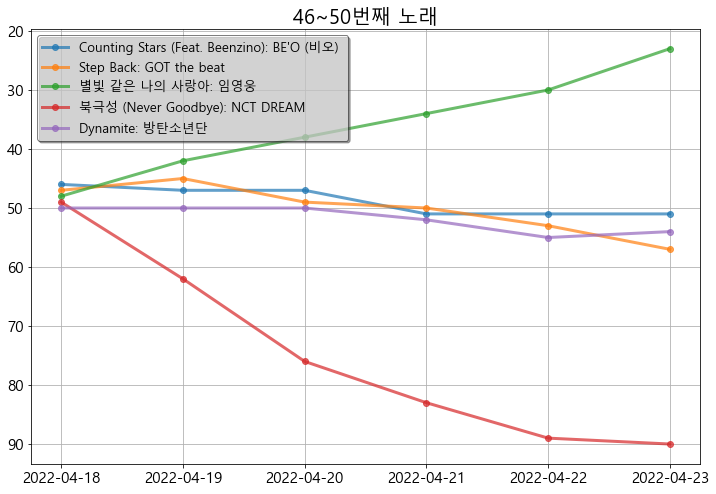

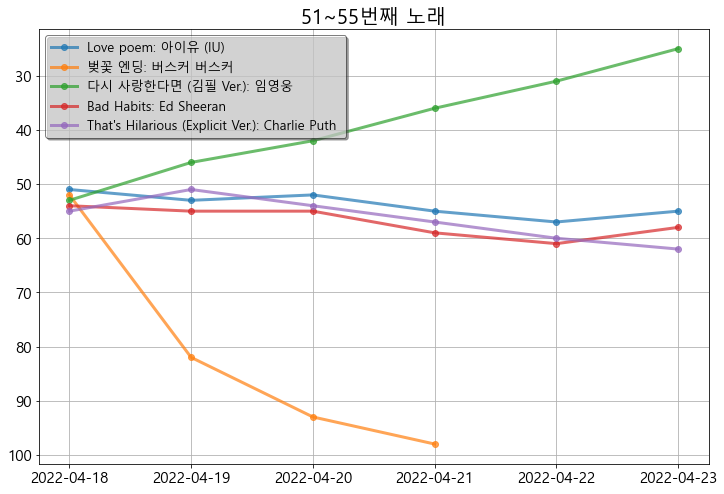

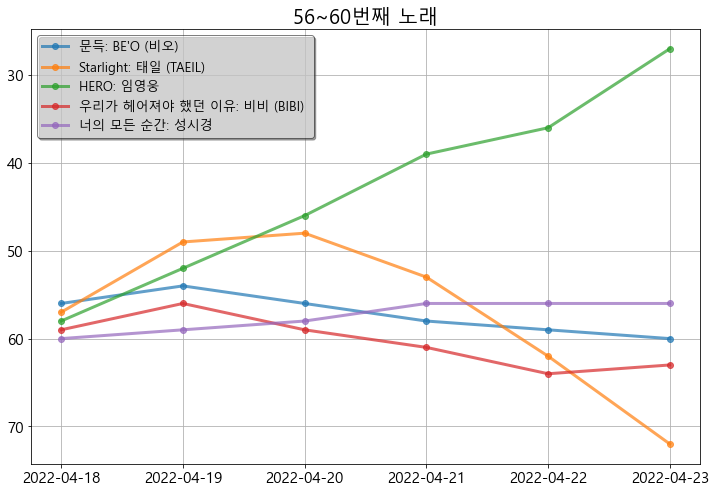

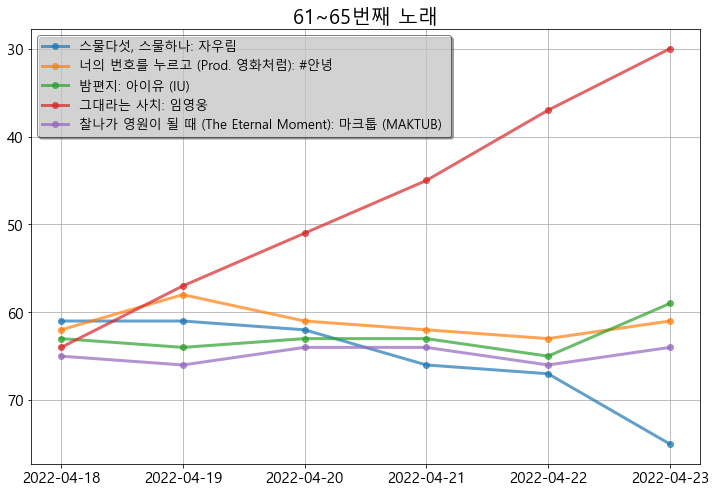

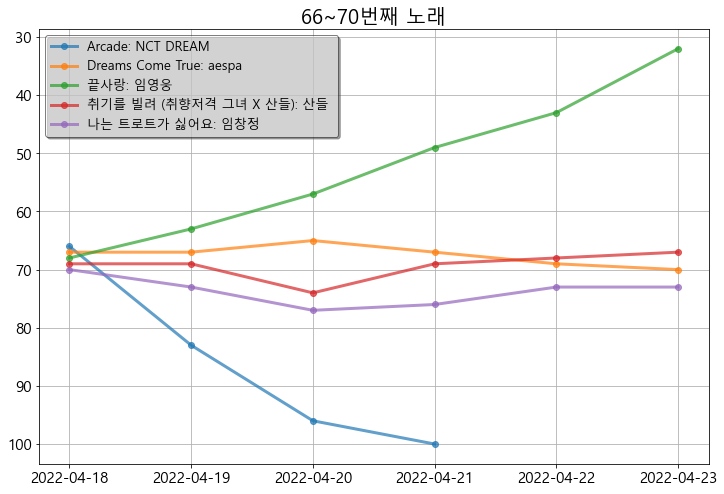

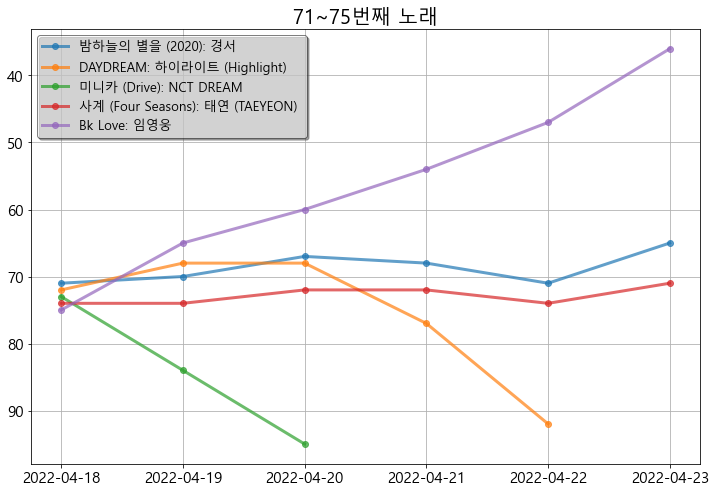

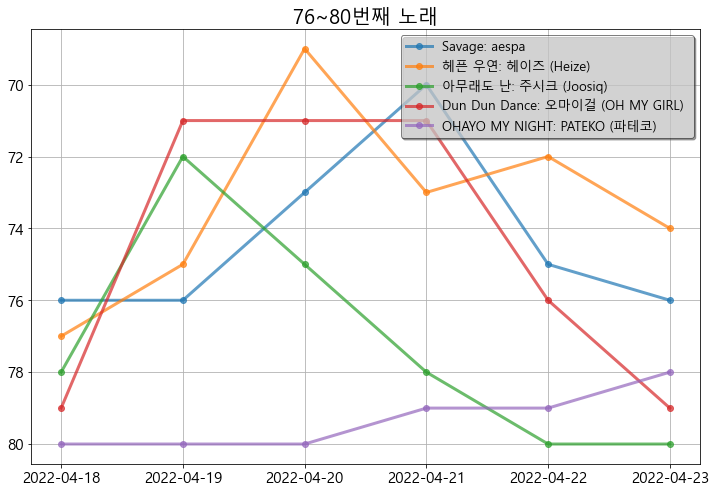

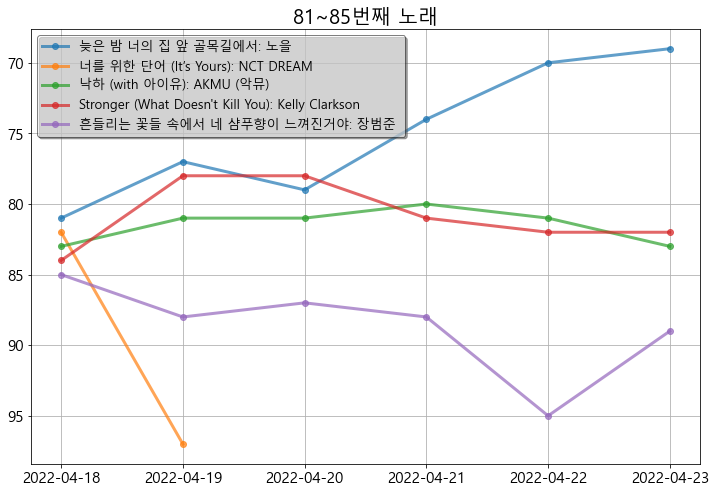

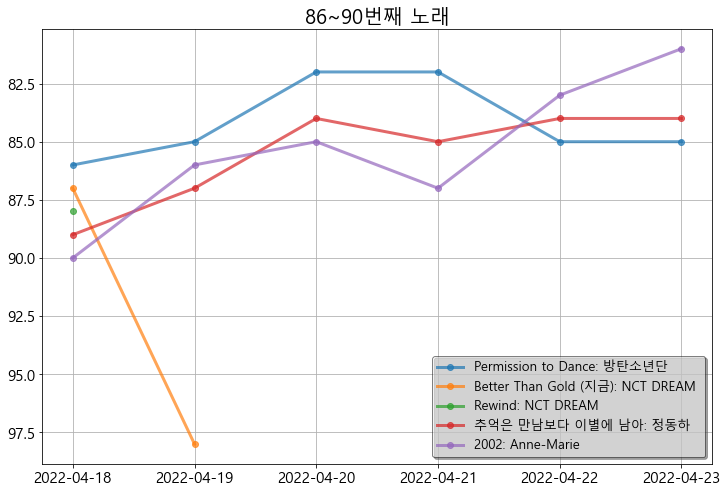

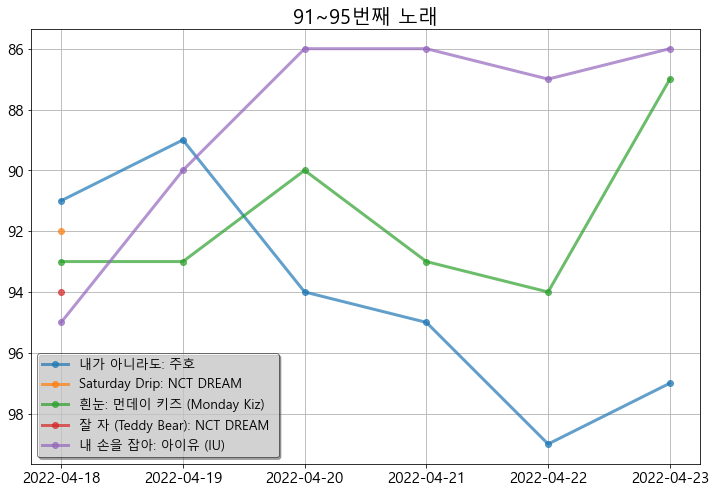

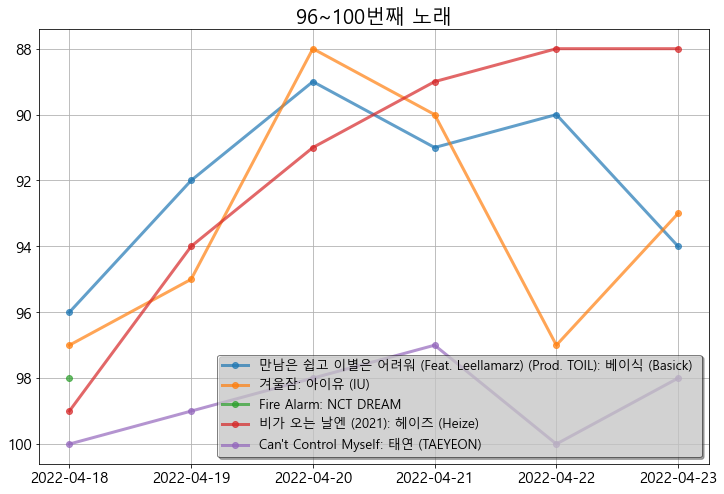

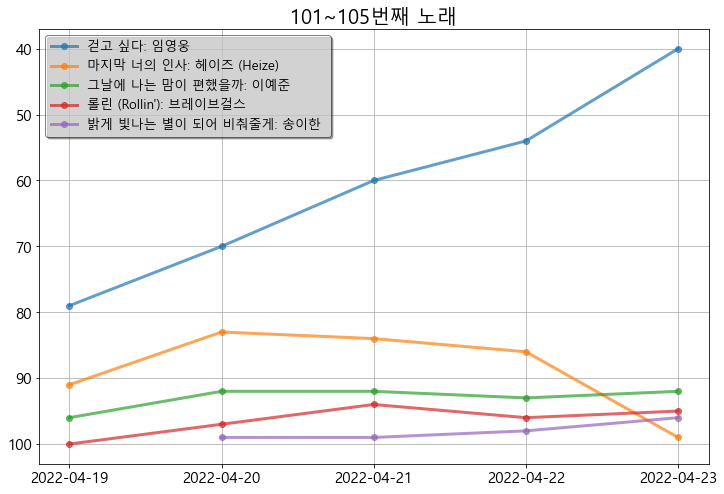

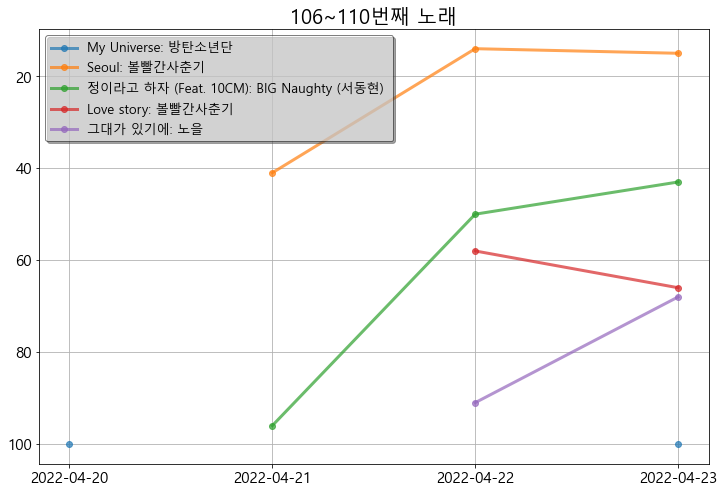

In [69]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [64]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

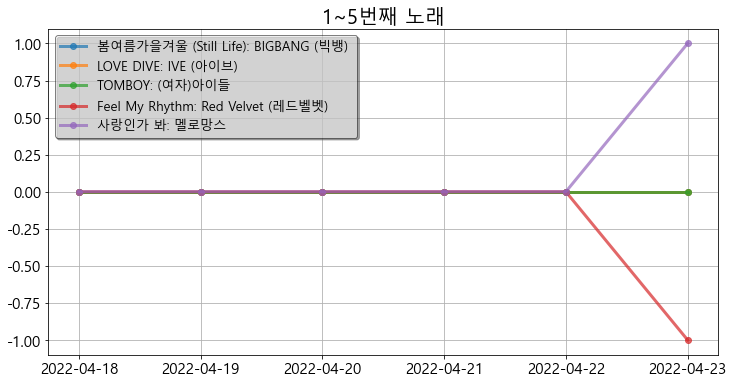

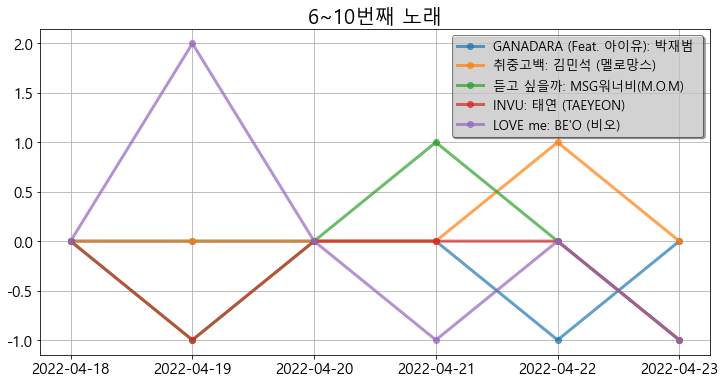

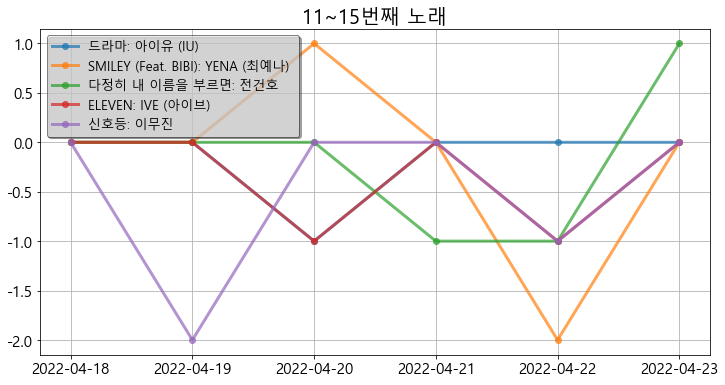

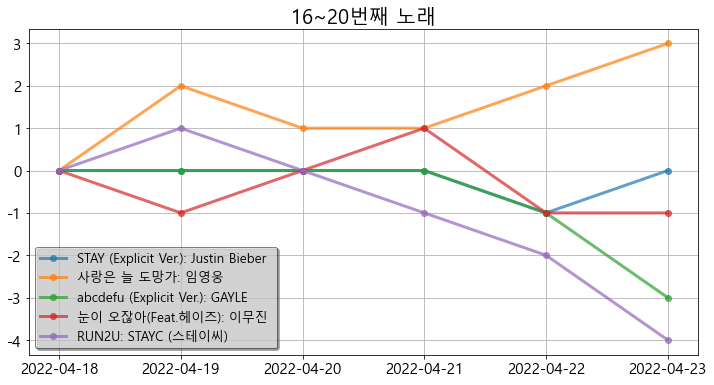

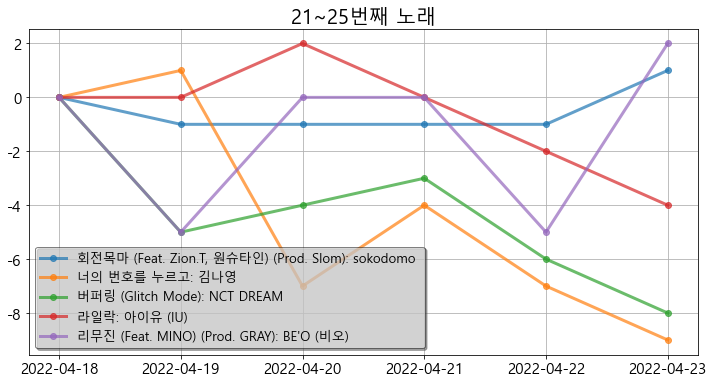

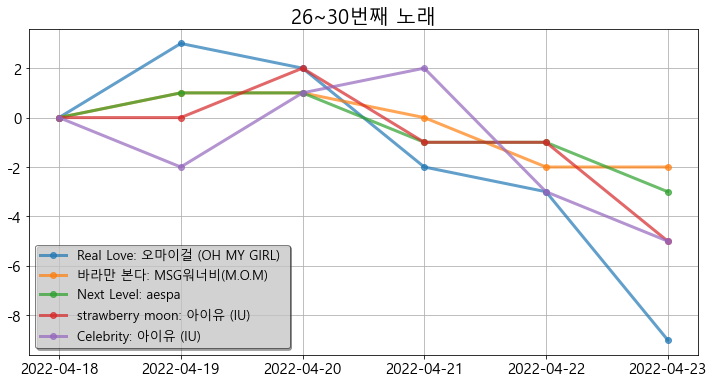

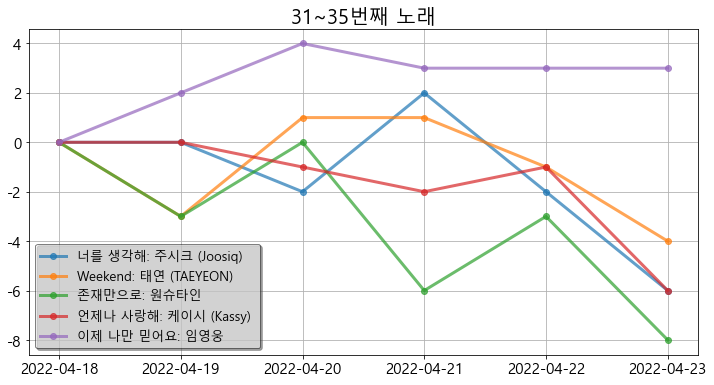

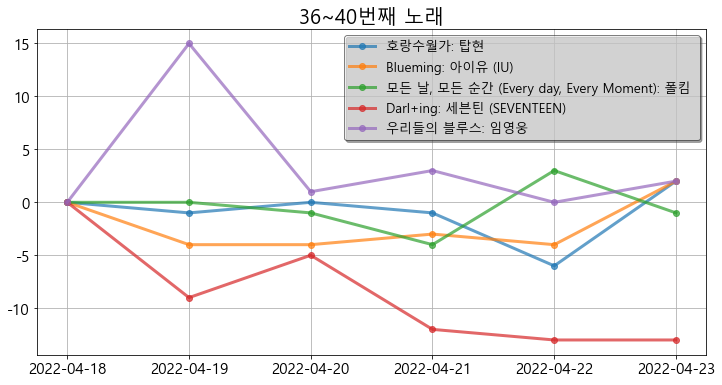

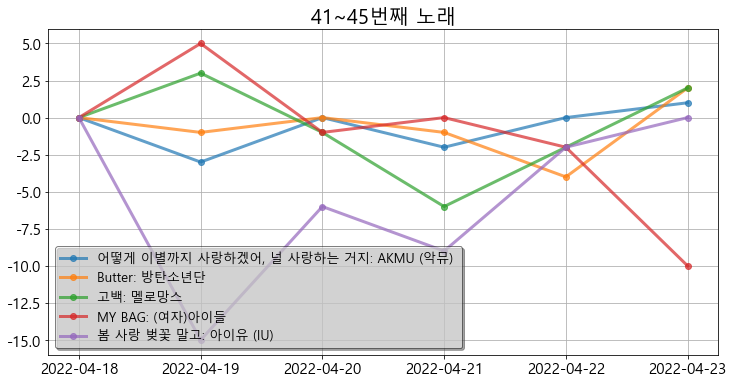

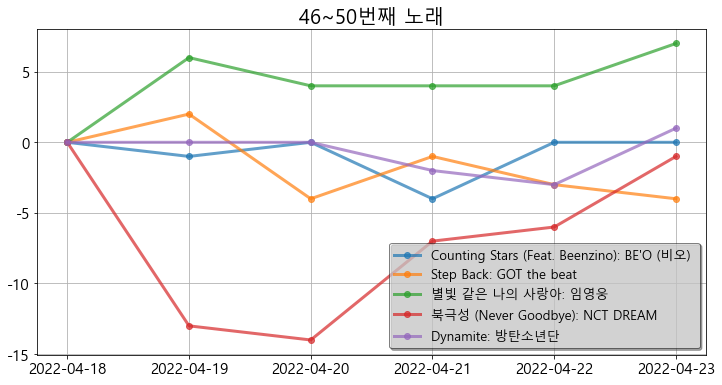

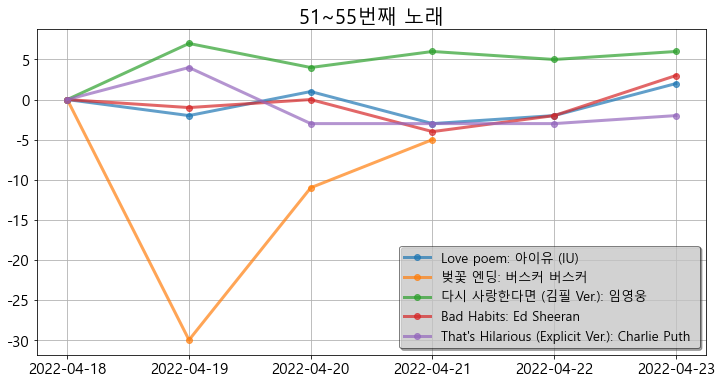

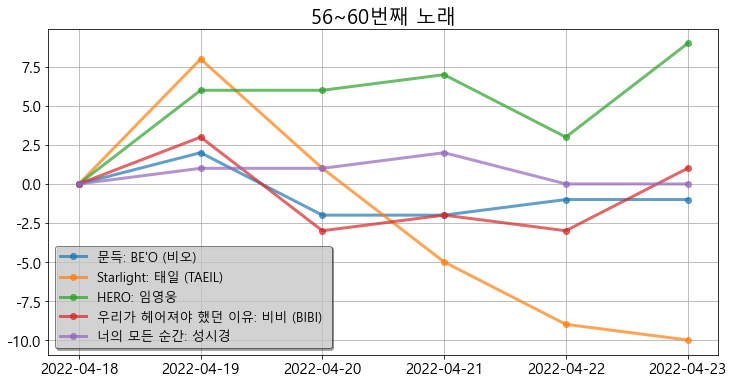

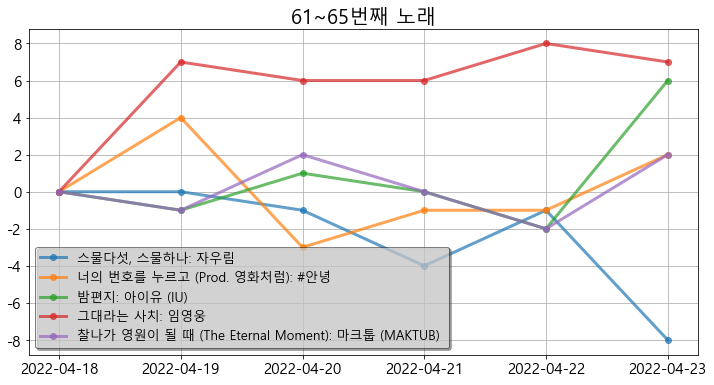

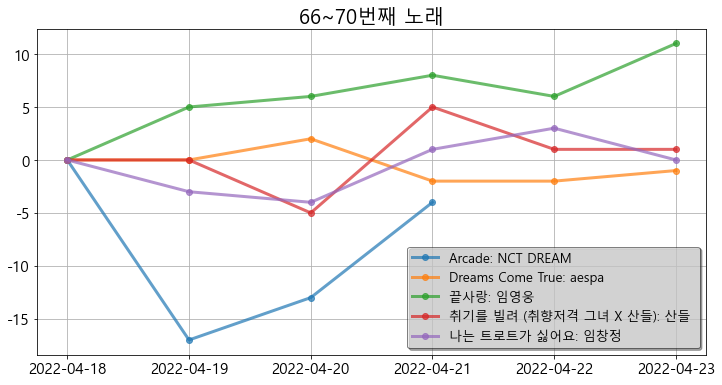

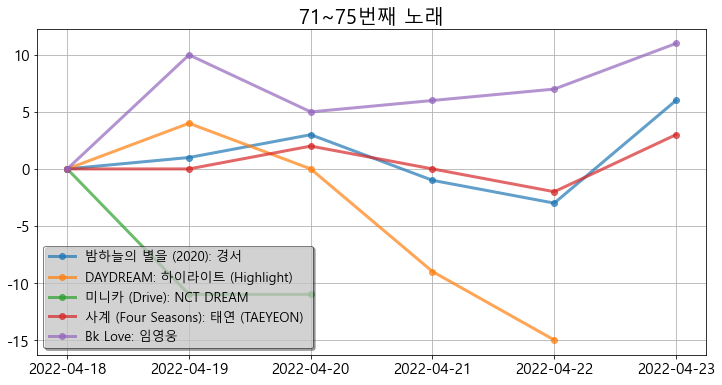

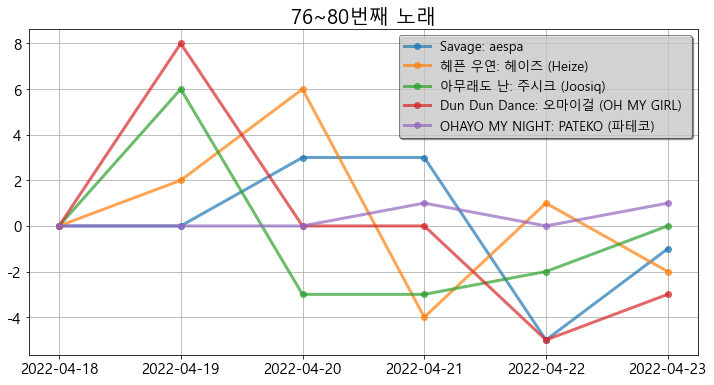

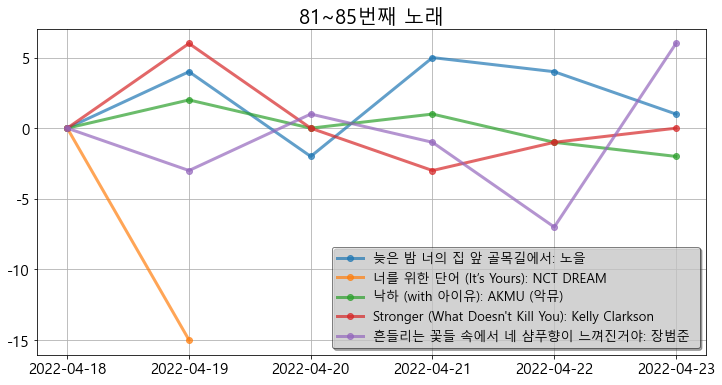

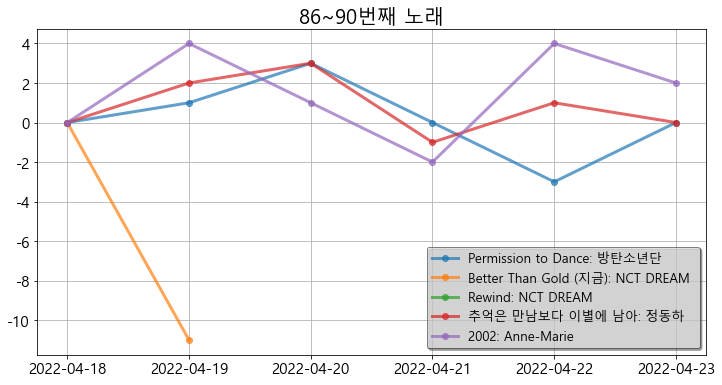

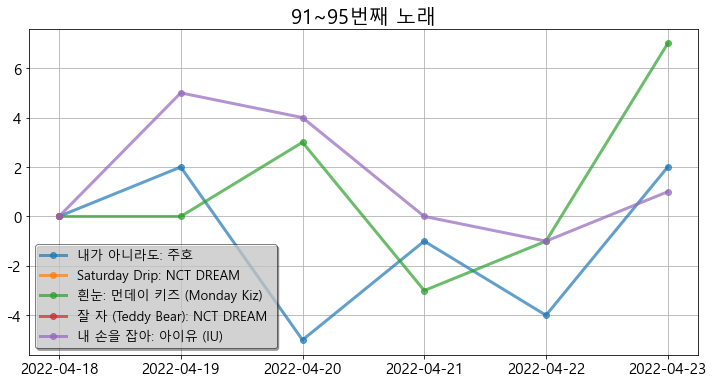

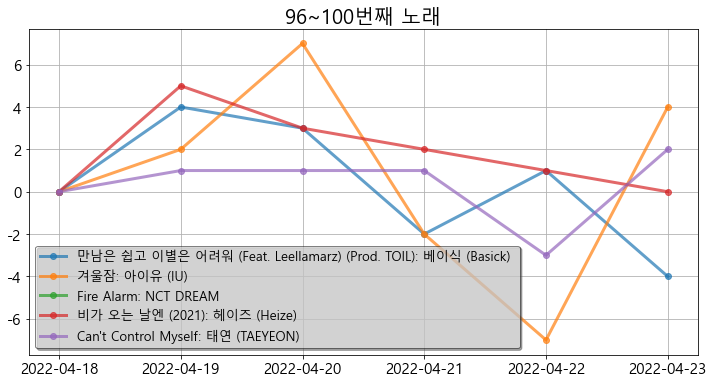

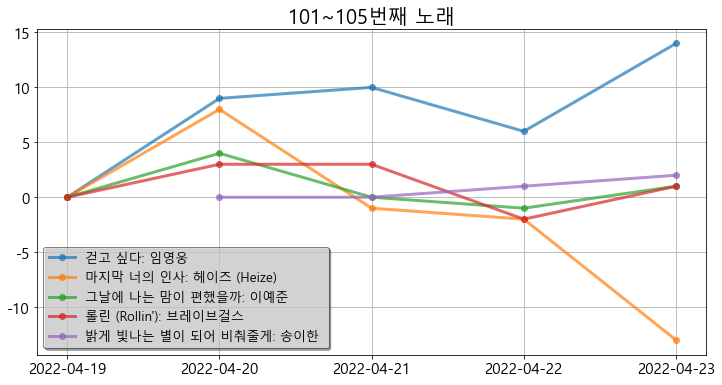

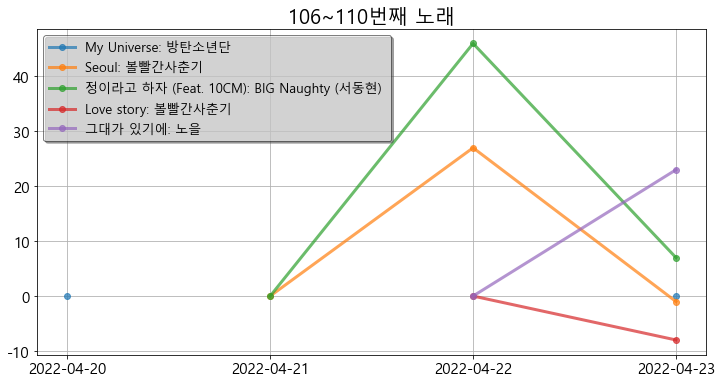

In [65]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 1곡씩 테스트

In [75]:
song_df_list[0]

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0
1,2022-04-19,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0
2,2022-04-20,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0
3,2022-04-21,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0
4,2022-04-22,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0
5,2022-04-23,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),0


In [76]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [78]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      660 non-null    object 
 1   순위      600 non-null    float64
 2   곡       600 non-null    object 
 3   가수      600 non-null    object 
 4   앨범      600 non-null    object 
 5   순위변동    600 non-null    float64
dtypes: float64(2), object(4)
memory usage: 31.1+ KB


In [84]:
total_df['순위변동'].describe()

count    600.000000
mean      -0.168333
std        4.605288
min      -30.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max       46.000000
Name: 순위변동, dtype: float64

In [87]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    172.000000
mean       3.953488
std        4.794995
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       46.000000
Name: 순위변동, dtype: float64

In [89]:
total_df[ total_df['순위변동'] > 5 + 1.5*4 ]

,날짜,순위,곡,가수,앨범,순위변동
235,2022-04-19,25.0,우리들의 블루스,임영웅,IM HERO,15.0
605,2022-04-23,40.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,14.0
640,2022-04-22,14.0,Seoul,볼빨간사춘기,Seoul,27.0
646,2022-04-22,50.0,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,46.0
659,2022-04-23,68.0,그대가 있기에,노을,그대가 있기에,23.0


### 급등 음원의 샘플 추출

In [90]:
big_change_music_name_list = total_df[ total_df['순위변동'] > 5 + 1.5*4 ]['곡'].tolist()
big_change_music_name_list

['우리들의 블루스', '걷고 싶다', 'Seoul', '정이라고 하자 (Feat. 10CM)', '그대가 있기에']

In [93]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[0]].reset_index(drop=True)
temp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,40.0,우리들의 블루스,임영웅,IM HERO,0.0
1,2022-04-19,25.0,우리들의 블루스,임영웅,IM HERO,15.0
2,2022-04-20,24.0,우리들의 블루스,임영웅,IM HERO,1.0
3,2022-04-21,21.0,우리들의 블루스,임영웅,IM HERO,3.0
4,2022-04-22,21.0,우리들의 블루스,임영웅,IM HERO,0.0
5,2022-04-23,19.0,우리들의 블루스,임영웅,IM HERO,2.0


In [97]:
title = temp['곡'].unique()
title

array(['우리들의 블루스'], dtype=object)

In [99]:
artist = temp['가수'].unique()
artist

array([' 임영웅 '], dtype=object)

In [107]:
basic_date_df['날짜'].tolist()

['2022-04-18',
 '2022-04-19',
 '2022-04-20',
 '2022-04-21',
 '2022-04-22',
 '2022-04-23']

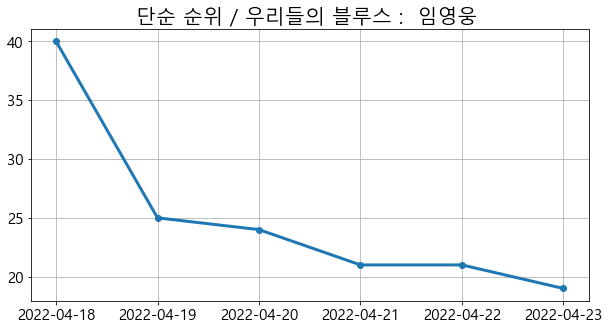

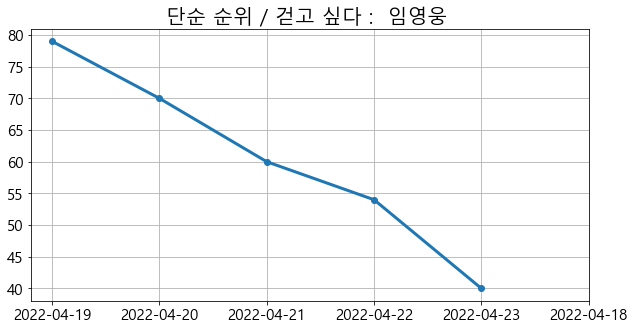

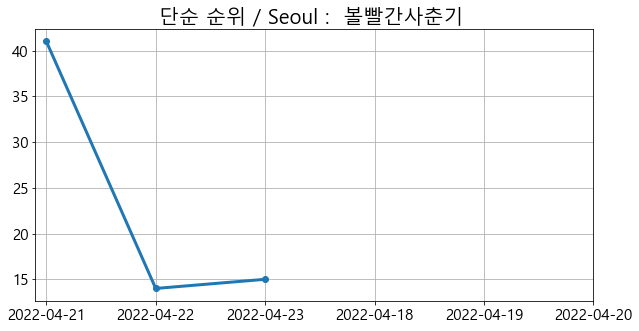

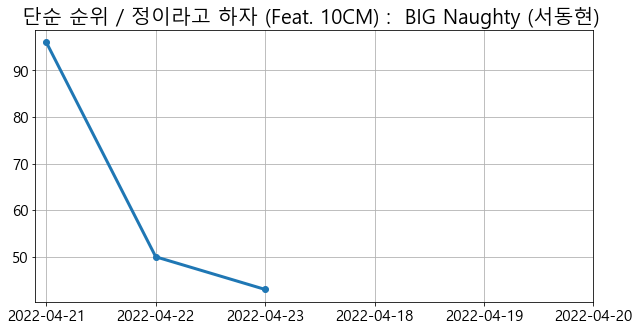

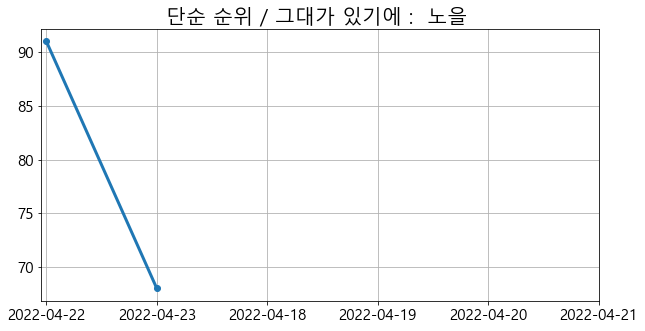

In [112]:
for one in big_change_music_name_list:
    temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
    title = temp['곡'].unique()[0]
    artist = temp['가수'].unique()[0]
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3)
    graph_title = '[단순 순위] ' + title + ' : ' + artist
    plt.title(graph_title, fontdict={'size':20})
    plt.xticks(basic_date_df['날짜'].tolist(), fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

# 코드 마지막